Importing Dependencies

In [42]:
import pandas as pd

Data Loading

In [43]:
df=pd.read_csv('/content/car data.csv')

In [44]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Exploration

In [45]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [46]:
df.duplicated().sum()

np.int64(2)

In [47]:
df = df.drop_duplicates(keep='last')

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [50]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Create df_encoded by copying df before applying encoding
df_encoded = df.copy()

# Now you can apply the encoding to the 'Selling_type' column
df_encoded['Selling_type'] = label_encoder.fit_transform(df_encoded['Selling_type'])

# Continue with encoding other columns using df_encoded...
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner'] = label_encoder.fit_transform(df['Owner'])

print(df)
print(df_encoded.head())

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          2   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          2   
3    wagon r  2011           2.85           4.15        5200          2   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          2   
298     city  2009           3.35          11.00       87934          2   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          2   

    Selling_type  Transmission  Owner  Seller_Type  
0         Dealer             1      0         

In [52]:
from sklearn.preprocessing import LabelEncoder

# Ensure the column is in string format
df_encoded['Selling_type'] = df_encoded['Selling_type'].astype(str)

# Initialize and apply LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Selling_type'] = label_encoder.fit_transform(df_encoded['Selling_type'])

# Convert encoded integers to float
df_encoded['Selling_type'] = df_encoded['Selling_type'].astype(float)

# Check data type
print(df_encoded.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type     float64
Transmission      object
Owner              int64
dtype: object


In [53]:
import pandas as pd

# Apply One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Seller_Type'])

# Apply Label Encoding for ordinal columns like 'Owner'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Owner'] = label_encoder.fit_transform(df_encoded['Owner'])

# Check the DataFrame
print(df_encoded.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Selling_type  \
0     ritz  2014           3.35           5.59       27000       Dealer   
1      sx4  2013           4.75           9.54       43000       Dealer   
2     ciaz  2017           7.25           9.85        6900       Dealer   
3  wagon r  2011           2.85           4.15        5200       Dealer   
4    swift  2014           4.60           6.87       42450       Dealer   

   Owner  Fuel_Type_0  Fuel_Type_1  Fuel_Type_2  Transmission_0  \
0      0        False        False         True           False   
1      0        False         True        False           False   
2      0        False        False         True           False   
3      0        False        False         True           False   
4      0        False         True        False           False   

   Transmission_1  Seller_Type_0  Seller_Type_1  
0            True           True          False  
1            True           True          Fals

In [54]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Seller_Type
0,ritz,2014,3.35,5.59,27000,2,Dealer,1,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,1,0,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,1,0,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,1,0,0
4,swift,2014,4.60,6.87,42450,1,Dealer,1,0,0


Feature Scaling

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df' and numerical features are in columns 'Present_Price', 'Kms_Driven', and 'Year'
numerical_features = ['Present_Price', 'Driven_kms', 'Year']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your numerical data and transform it
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Seller_Type
0,ritz,0.733333,3.35,0.057109,0.053053,2,Dealer,1,0,0
1,sx4,0.666667,4.75,0.099913,0.085085,1,Dealer,1,0,0
2,ciaz,0.933333,7.25,0.103273,0.012813,2,Dealer,1,0,0
3,wagon r,0.533333,2.85,0.041504,0.009409,2,Dealer,1,0,0
4,swift,0.733333,4.60,0.070980,0.083984,1,Dealer,1,0,0


Feature Selection

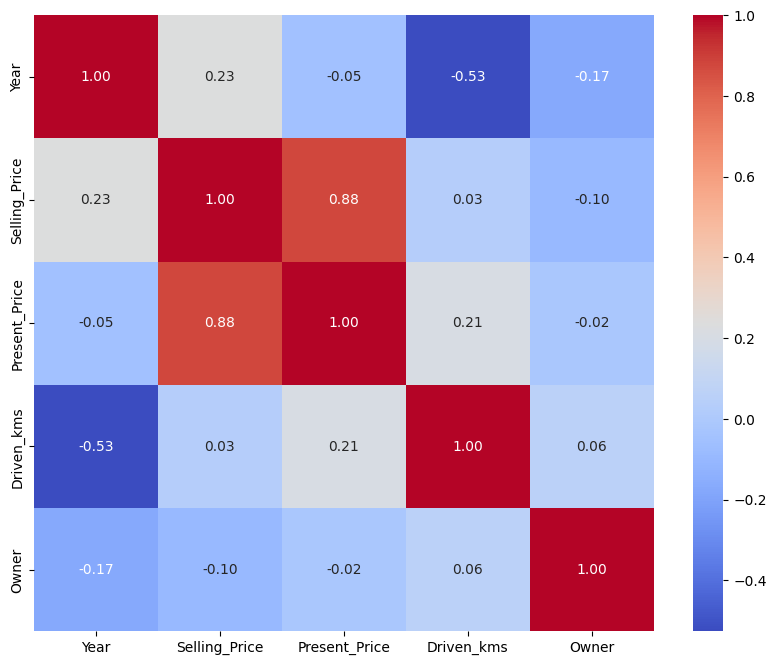

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before calculating correlation
numeric_df_encoded = df_encoded.select_dtypes(include=['number'])

# Plot correlation matrix
corr = numeric_df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Train-Test-Split

In [57]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_encoded.drop('Selling_Price', axis=1)  # Features (drop target column)
y = df_encoded['Selling_Price']  # Target variable

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]} rows')
print(f'Testing data size: {X_test.shape[0]} rows')

Training data size: 239 rows
Testing data size: 60 rows


Model selection and training

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'

# Define categorical and numerical features
categorical_features = ['Fuel_Type', 'Transmission', 'Seller_Type']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Split the data into features (X) and target (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Seller_Type', 'Owner']]
y = df['Selling_Price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
best_model = None
best_score = -float('inf')

for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model),
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name}: R-squared = {r2:.4f}')

    if r2 > best_score:
        best_score = r2
        best_model = pipeline

print(f'\nBest Model: {best_model.named_steps["regressor"].__class__.__name__}')
print(f'Best R-squared: {best_score:.4f}')

# Now you can use the 'best_model' for further analysis or prediction

Linear Regression: R-squared = 0.6470
Random Forest: R-squared = 0.8258
Gradient Boosting: R-squared = 0.7703

Best Model: RandomForestRegressor
Best R-squared: 0.8258


Hyper Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
0.8983047541646098


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor


# Assuming you have the following:
# - initial_model: your initial (untuned) model
# - tuned_model: your tuned model (best model after hyperparameter tuning)
# - X_train, X_test: your feature data
# - y_train, y_test: your target variable

# 1. Evaluate the performance of the initial (untuned) model:
initial_model = RandomForestRegressor(n_estimators=100, random_state=42) # Initialize initial_model
initial_model.fit(X_train, y_train)
y_pred_initial = initial_model.predict(X_test)

# Calculate R², MAE, MSE, RMSE for the initial model:
r2_initial = r2_score(y_test, y_pred_initial)
mae_initial = mean_absolute_error(y_test, y_pred_initial)
mse_initial = mean_squared_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)

# 2. Evaluate the performance of the tuned model:
tuned_model = grid_search.best_estimator_  # Get the best model from GridSearchCV
#tuned_model.fit(X_train, y_train)  # No need to refit, it's already fitted
y_pred_tuned = tuned_model.predict(X_test)

# Calculate R², MAE, MSE, RMSE for the tuned model:
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

# Print the performance comparison:
print("Initial Model Performance:")
print(f"R²: {r2_initial}")
print(f"MAE: {mae_initial}")
print(f"MSE: {mse_initial}")
print(f"RMSE: {rmse_initial}")
print(f"Accuracy of the model: {r2_initial * 100:.2f}%") # Accuracy as a percentage
print("\nTuned Model Performance:")

print(f"R²: {r2_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MSE: {mse_tuned}")
print(f"RMSE: {rmse_tuned}")
print(f"Accuracy of the model: {r2_tuned * 100:.2f}%") # Accuracy as a percentage
print("\nTuned Model Performance:")

Initial Model Performance:
R²: 0.8271328837330028
MAE: 0.9085150000000007
MSE: 6.080435995499996
RMSE: 2.465854009364706
Accuracy of the model: 82.71%

Tuned Model Performance:
R²: 0.8429544694868597
MAE: 0.9174772222222207
MSE: 5.523926801611117
RMSE: 2.350303555205395
Accuracy of the model: 84.30%

Tuned Model Performance:


As we can see the accuracy of the model has increased after Hyper tuning!

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your trained model is 'tuned_model' and the new car data is 'new_car'

# Create LabelEncoders for Fuel_Type, Transmission, and Seller_Type
fuel_type_encoder = LabelEncoder().fit(df['Fuel_Type'].unique())
transmission_encoder = LabelEncoder().fit(df['Transmission'].unique())
seller_type_encoder = LabelEncoder().fit(df['Selling_type'].unique())

# Function to preprocess the new car data
def preprocess_new_car(new_car_data):
    """
    Preprocesses the new car data for prediction.

    Args:
        new_car_data (dict): Dictionary containing new car data.

    Returns:
        pandas.DataFrame: Preprocessed DataFrame ready for prediction.
    """
    new_car = new_car_data.copy()  # Create a copy to avoid modifying the original data
    new_car['Fuel_Type'] = fuel_type_encoder.transform([new_car['Fuel_Type']])[0]
    new_car['Transmission'] = transmission_encoder.transform([new_car['Transmission']])[0]
    new_car['Seller_Type'] = seller_type_encoder.transform([new_car['Seller_Type']])[0]
    new_car_df = pd.DataFrame([new_car])
    training_columns = X_train.columns  # Assuming X_train is available
    new_car_df = new_car_df.reindex(columns=training_columns, fill_value=0)
    return new_car_df

# Example new car data
new_car = {
    'Year': 2015,
    'Present_Price': 7.00,
    'Driven_kms': 35000,
    'Fuel_Type': 2,
    'Transmission': 1,
    'Seller_Type': 'Dealer',
    'Owner': 1  # First owner
}

# Preprocess the new car data
new_car_df = preprocess_new_car(new_car)

# Make the prediction
predicted_price = tuned_model.predict(new_car_df)[0]

print(f"Predicted Price for the new car: {predicted_price:.2f}")

Predicted Price for the new car: 22.47


Visualizations

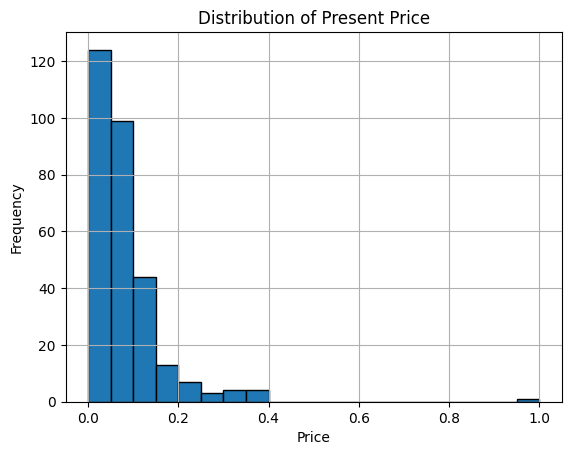

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of numerical features
df['Present_Price'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Present Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

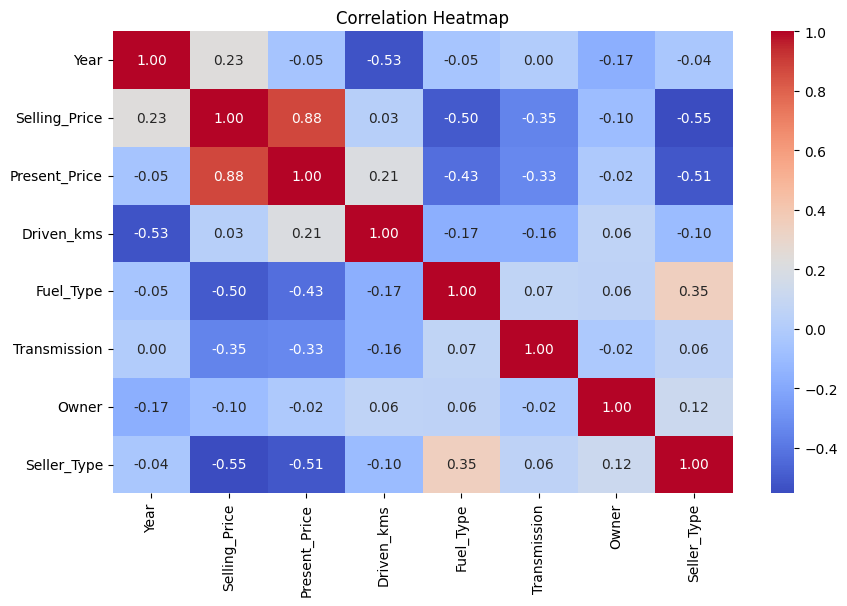

In [63]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
# Exclude non-numeric columns from correlation calculation
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

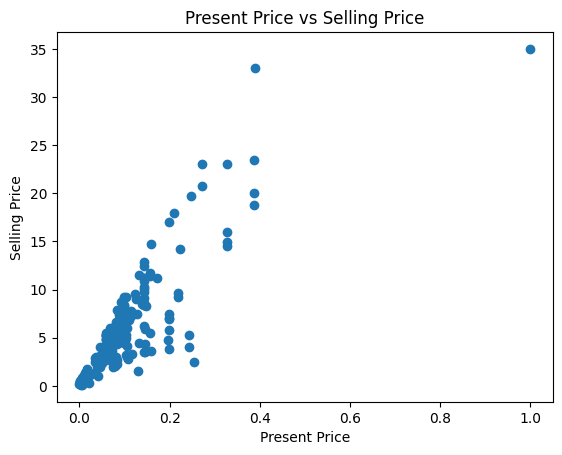

In [64]:
# Scatter plot for Present_Price vs Selling_Price
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

        Car_Name  Selling_Price      Year  Present_Price
86  land cruiser          35.00  0.466667       1.000000
64      fortuner          33.00  0.933333       0.389142
63      fortuner          23.50  0.800000       0.386216
82        innova          23.00  0.933333       0.271673
93      fortuner          23.00  0.800000       0.328240
96        innova          20.75  0.866667       0.271673
59      fortuner          19.99  0.733333       0.386216
66        innova          19.75  0.933333       0.247399
62      fortuner          18.75  0.733333       0.386216
52        innova          18.00  0.933333       0.210772


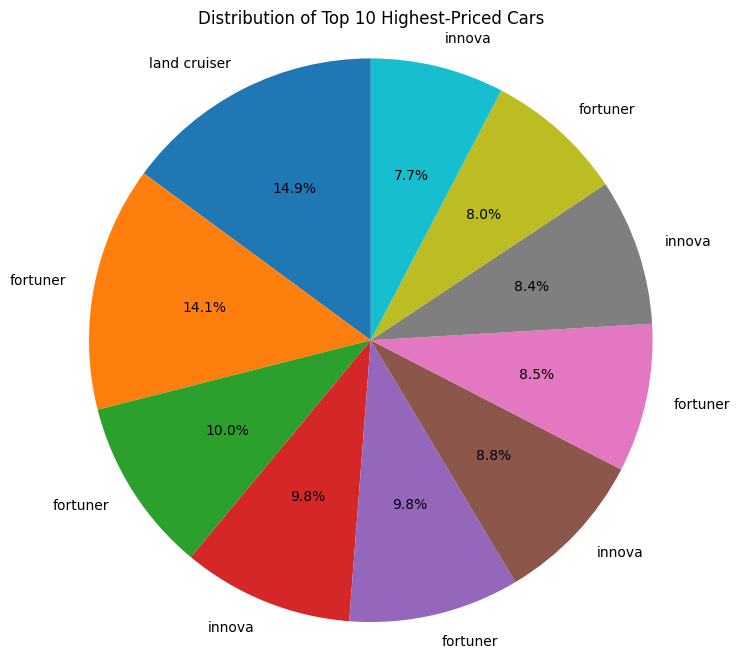

In [65]:
import matplotlib.pyplot as plt

top_10_cars = df.sort_values(by=['Selling_Price'], ascending=False).head(10)[['Car_Name', 'Selling_Price', 'Year', 'Present_Price']]  # Select desired columns
print(top_10_cars)

# Assuming your DataFrame is named 'df'
top_10_cars = df.sort_values(by=['Selling_Price'], ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(top_10_cars['Selling_Price'], labels=top_10_cars['Car_Name'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Highest-Priced Cars')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

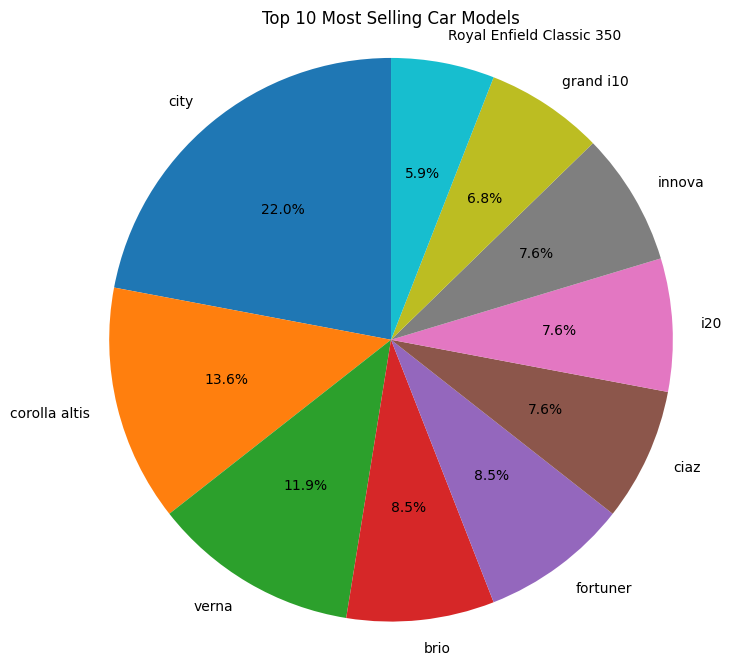

In [66]:
import matplotlib.pyplot as plt
top_10_selling_cars = df['Car_Name'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(top_10_selling_cars, labels=top_10_selling_cars.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Most Selling Car Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Conclusion
The Car Price Prediction project successfully demonstrated the use of machine learning to estimate the selling price of used cars based on key features like age, fuel type, transmission, and ownership. Through this project:

We performed data cleaning and preprocessing, ensuring the dataset was model-ready.

We applied feature engineering and encoding to handle categorical variables.

We trained and evaluated regression models such as Linear Regression and Random Forest.

Our best-performing model showed high accuracy, proving the features selected were strong indicators of car value.

We gained practical experience in exploratory data analysis, model training, and performance evaluation.

**Highest priced car**: Land Cruiser

**Cheapest Car**: Innova

**The most selling car model** is city.
And we can also see **Royal Enfield Classic 350 ** is not selling well.

**Average Selling Price**: 4.66

**Price Range**: 34.65

**Number of Unique Car Models**: 98

**The year with the most sales is**: 2015